In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
food=pd.read_csv('marketing_data.csv')

In [51]:
print(food.head())

      id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0   1826       1970  Graduation      Divorced  $84,835.00         0         0   
1      1       1961  Graduation        Single  $57,091.00         0         0   
2  10476       1958  Graduation       Married  $67,267.00         0         1   
3   1386       1967  Graduation      Together  $32,474.00         1         1   
4   5371       1989  Graduation        Single  $21,474.00         1         0   

  DtCustomer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0    6/16/14        0       189  ...                  6                  1   
1    6/15/14        0       464  ...                  7                  5   
2    5/13/14        0       134  ...                  5                  2   
3    5/11/14        0        10  ...                  2                  7   
4     4/8/14        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5 

In [52]:
print(food.describe(include='all'))

                  id    YearBirth   Education MaritalStatus      Income  \
count    2240.000000  2240.000000        2240          2240        2216   
unique           NaN          NaN           5             8        1974   
top              NaN          NaN  Graduation       Married  $7,500.00    
freq             NaN          NaN        1127           864          12   
mean     5592.159821  1968.805804         NaN           NaN         NaN   
std      3246.662198    11.984069         NaN           NaN         NaN   
min         0.000000  1893.000000         NaN           NaN         NaN   
25%      2828.250000  1959.000000         NaN           NaN         NaN   
50%      5458.500000  1970.000000         NaN           NaN         NaN   
75%      8427.750000  1977.000000         NaN           NaN         NaN   
max     11191.000000  1996.000000         NaN           NaN         NaN   

            Kidhome     Teenhome DtCustomer      Recency     MntWines  ...  \
count   2240.000000  

In [53]:
print(food.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [54]:
print(food.MaritalStatus.unique())

['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [55]:
print(food.MaritalStatus.value_counts())

MaritalStatus
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


In [56]:
food.MaritalStatus=food.MaritalStatus.replace(['Alone','YOLO','Absurd'],'Single')

In [57]:
print(food.MaritalStatus.value_counts())

MaritalStatus
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64


In [58]:
food.Income=food.Income.str.strip('$')

In [59]:
food.Income=food.Income.str.replace(',','')
print(food.Income.head())

0    84835.00 
1    57091.00 
2    67267.00 
3    32474.00 
4    21474.00 
Name: Income, dtype: object


In [60]:
food.Income=pd.to_numeric(food.Income)
print(food.Income.head())

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64


In [61]:
food['MntTotal']=np.sum(food[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProducts']],axis=1)

In [62]:
food['PurchaseTotal']=np.sum(food[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']],axis=1)

In [63]:
food['ChildrenTotal']=np.sum(food[['Kidhome','Teenhome']],axis=1)
food['DtCustomer']=pd.to_datetime(food.DtCustomer)

C:\Users\bichn\AppData\Local\Temp\ipykernel_12900\3588172345.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  food['DtCustomer']=pd.to_datetime(food.DtCustomer)


In [64]:
print(food.describe(include='all'))

                  id    YearBirth   Education MaritalStatus         Income  \
count    2240.000000  2240.000000        2240          2240    2216.000000   
unique           NaN          NaN           5             5            NaN   
top              NaN          NaN  Graduation       Married            NaN   
freq             NaN          NaN        1127           864            NaN   
mean     5592.159821  1968.805804         NaN           NaN   52247.251354   
min         0.000000  1893.000000         NaN           NaN    1730.000000   
25%      2828.250000  1959.000000         NaN           NaN   35303.000000   
50%      5458.500000  1970.000000         NaN           NaN   51381.500000   
75%      8427.750000  1977.000000         NaN           NaN   68522.000000   
max     11191.000000  1996.000000         NaN           NaN  666666.000000   
std      3246.662198    11.984069         NaN           NaN   25173.076661   

            Kidhome     Teenhome                     DtCustomer

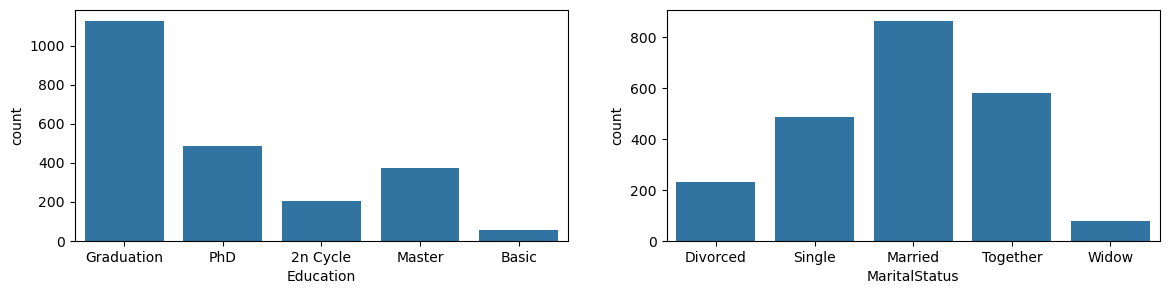

In [65]:
plt.close('all')
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.countplot(x='Education',data=food)
plt.subplot(1,2,2)
sns.countplot(x='MaritalStatus',data=food)
plt.show()

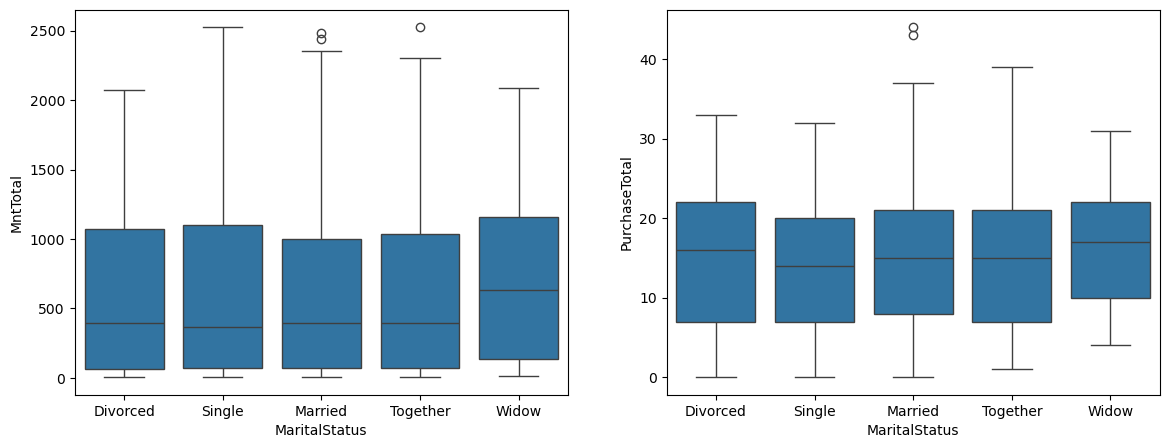

In [66]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(x='MaritalStatus',y='MntTotal',data=food)
plt.subplot(1,2,2)
sns.boxplot(x='MaritalStatus',y='PurchaseTotal',data=food)
plt.show()

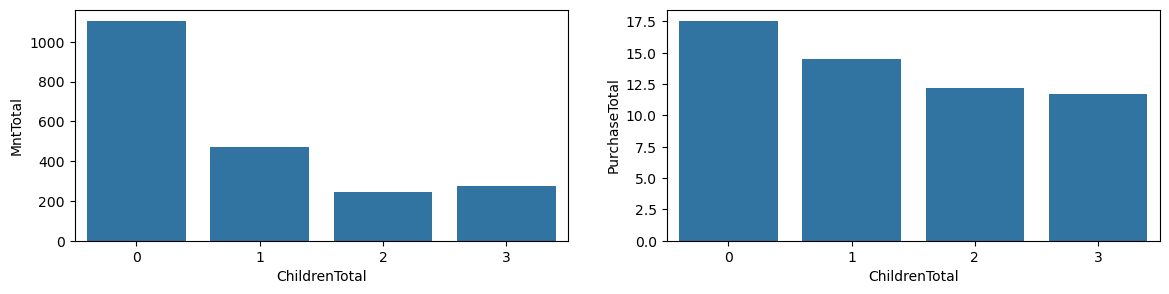

In [67]:
plt.close('all')
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.barplot(x='ChildrenTotal',y='MntTotal',data=food, errorbar=None)
plt.subplot(1,2,2)
sns.barplot(x='ChildrenTotal',y='PurchaseTotal',data=food, errorbar=None)
plt.show()

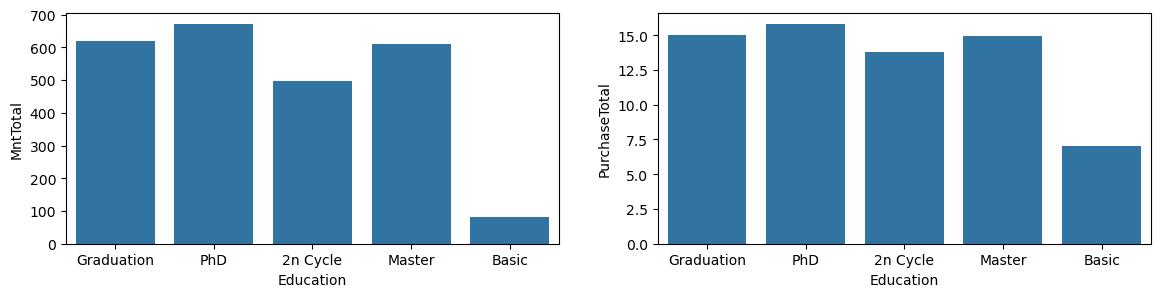

In [68]:
plt.close('all')
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.barplot(x='Education',y='MntTotal',data=food, errorbar=None)
plt.subplot(1,2,2)
sns.barplot(x='Education',y='PurchaseTotal',data=food, errorbar=None)
plt.show()

<Figure size 640x480 with 0 Axes>

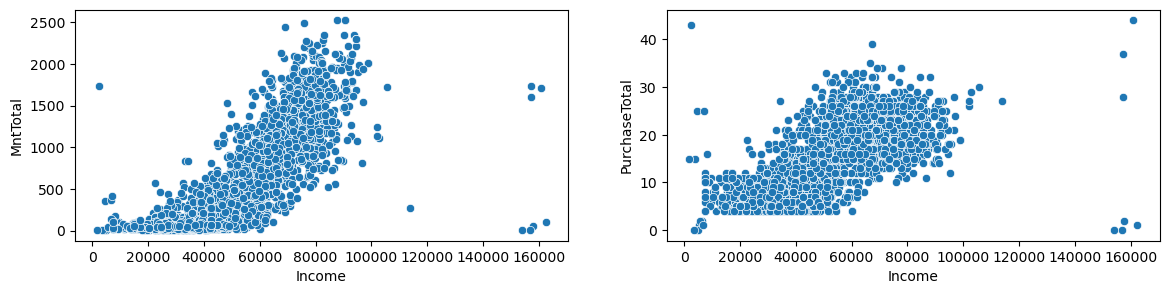

In [69]:
plt.clf()
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.scatterplot(x='Income',y='MntTotal',data=food[food.Income<170000])
plt.subplot(1,2,2)
sns.scatterplot(x='Income', y='PurchaseTotal', data=food[food.Income<170000])
plt.show()

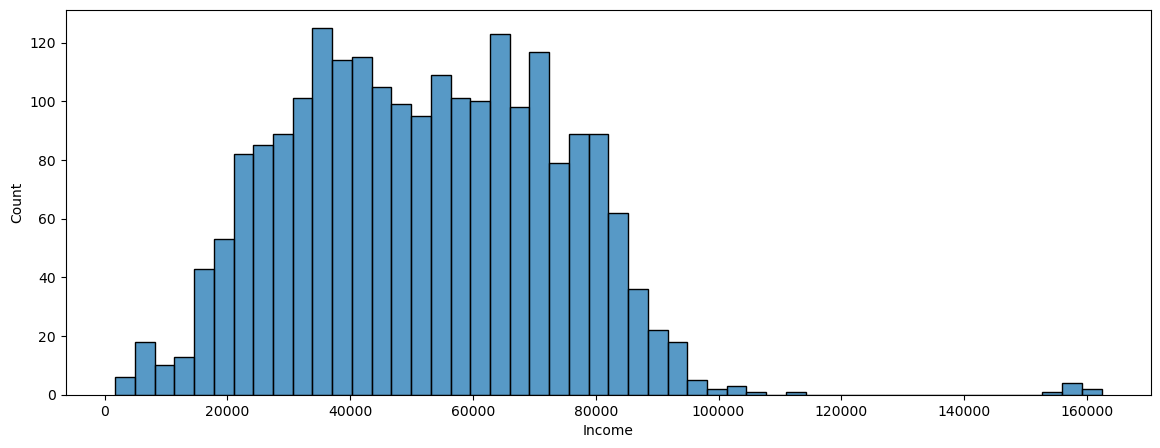

In [70]:
plt.figure(figsize=(14,5))
sns.histplot(x='Income', data=food[food.Income<170000], bins=50)
plt.show()

In [71]:
marital_average= food.groupby('MaritalStatus')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts']].mean()

print(marital_average)

                 MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
MaritalStatus                                                            
Divorced       324.844828  27.426724       150.206897        35.043103   
Married        299.480324  25.734954       160.681713        35.380787   
Single         288.106776  26.833676       181.141684        38.574949   
Together       306.825862  25.350000       168.103448        38.991379   
Widow          369.272727  33.090909       189.285714        51.389610   

               MntSweetProducts  MntGoldProducts  
MaritalStatus                                     
Divorced              26.818966        46.288793  
Married               26.701389        42.822917  
Single                27.051335        44.277207  
Together              26.122414        42.994828  
Widow                 39.012987        56.766234  


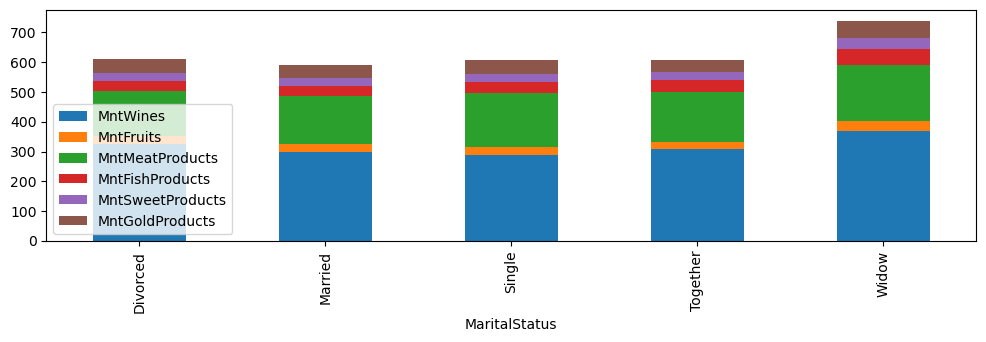

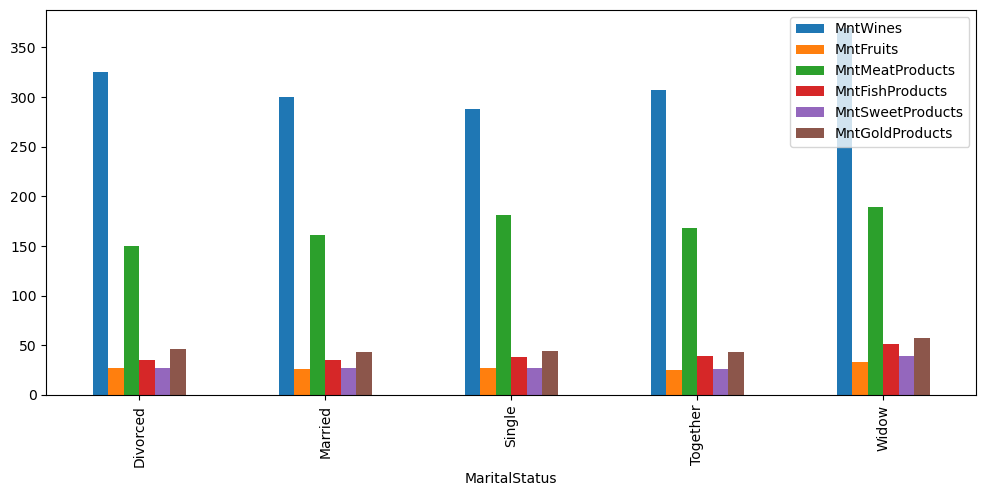

In [72]:
marital_average.plot(kind='bar', stacked=True, figsize=(12,3))
plt.show()
marital_average.plot(kind='bar', figsize=(12,5))
plt.show()

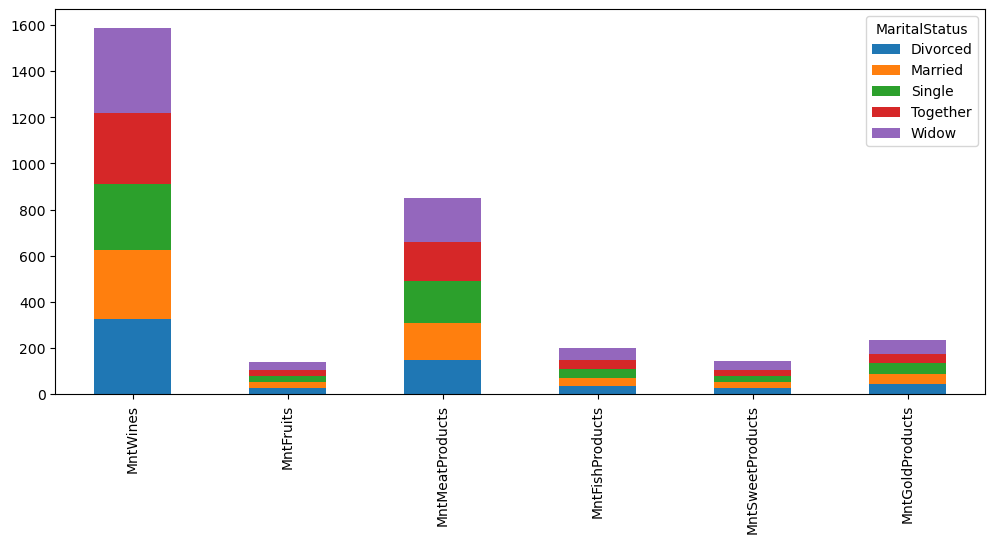

In [73]:
marital_average.transpose().plot(kind='bar', stacked=True, figsize=(12,5))
plt.show()

In [74]:
print(food.columns)

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'MntTotal',
       'PurchaseTotal', 'ChildrenTotal'],
      dtype='object')


In [75]:
marital_purchase_average= food.groupby('MaritalStatus')[['NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
print(marital_purchase_average)

               NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
MaritalStatus                                                            
Divorced                2.435345         4.310345             2.672414   
Married                 2.392361         4.087963             2.625000   
Single                  2.151951         3.891170             2.601643   
Together                2.324138         4.081034             2.675862   
Widow                   2.337662         4.623377             3.324675   

               NumStorePurchases  
MaritalStatus                     
Divorced                5.818966  
Married                 5.850694  
Single                  5.634497  
Together                5.736207  
Widow                   6.415584  


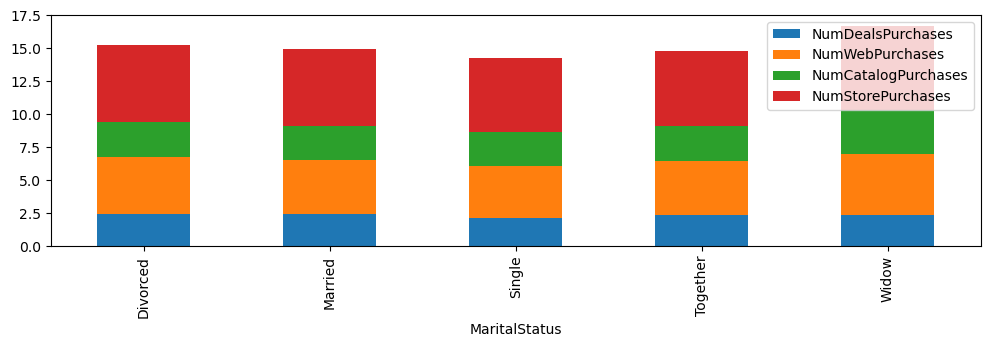

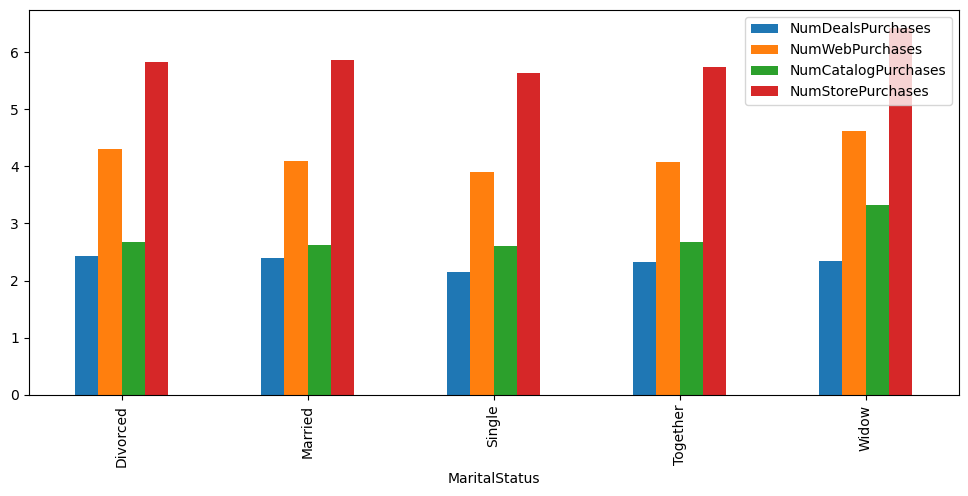

In [76]:
marital_purchase_average.plot(kind='bar', stacked=True, figsize=(12,3))
plt.show()
marital_purchase_average.plot(kind='bar', figsize=(12,5))
plt.show()

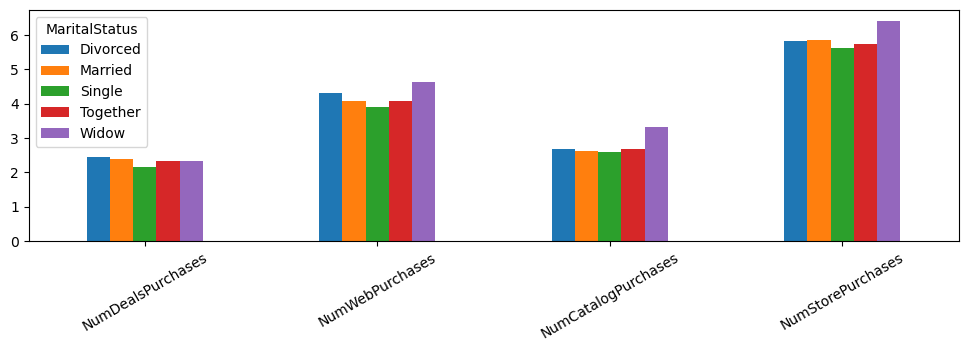

In [77]:
marital_purchase_average.transpose().plot(kind='bar', figsize=(12,3))
plt.xticks(rotation=30)
plt.show()

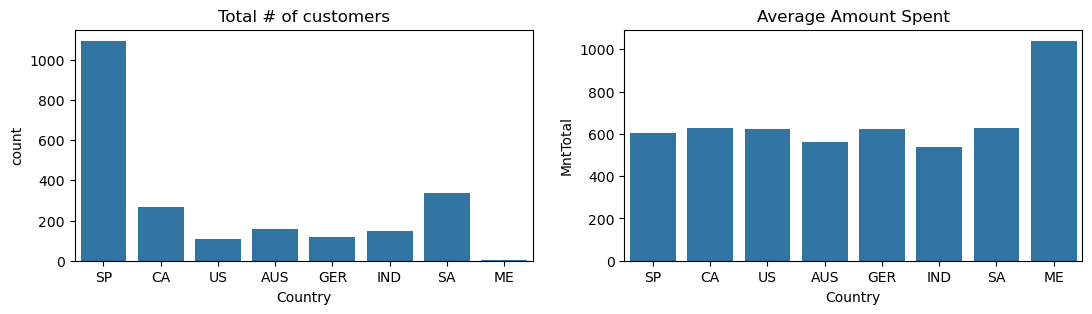

In [78]:
plt.figure(figsize=(13,3))
plt.subplot(1,2,1)
sns.countplot(x='Country',data=food)
plt.title('Total # of customers')
plt.subplot(1,2,2)
sns.barplot(x='Country',y='MntTotal', data=food, errorbar=None)
plt.title('Average Amount Spent')
plt.show()

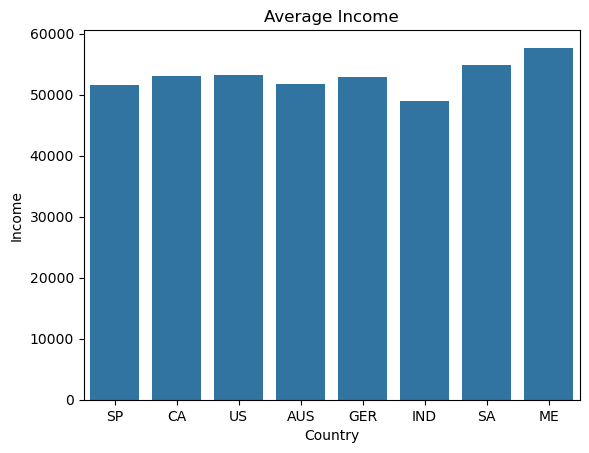

In [79]:
sns.barplot(x='Country',y='Income', data=food, errorbar=None)
plt.title('Average Income')
plt.show()

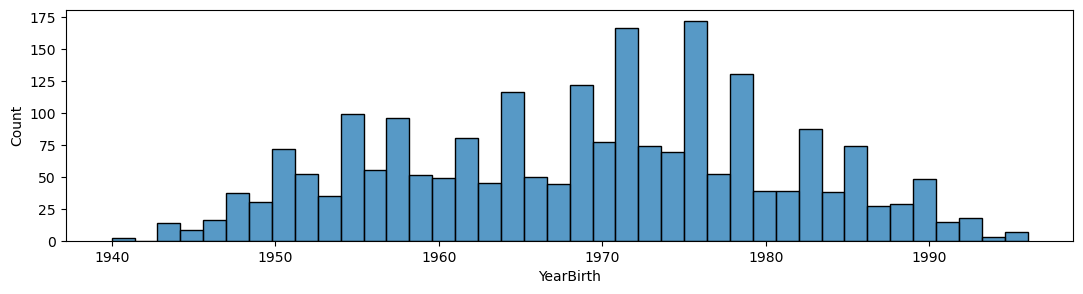

In [80]:
plt.figure(figsize=(13,3))
sns.histplot(x='YearBirth',data=food[food.YearBirth>1935],bins=40)
plt.show()

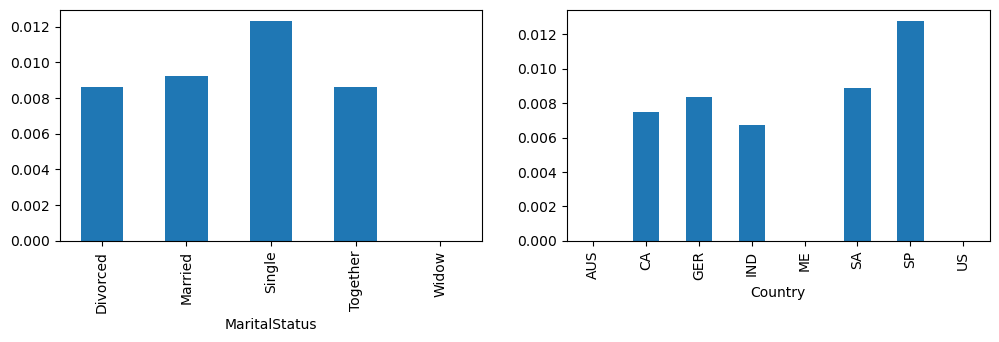

In [81]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
food.groupby('MaritalStatus')['Complain'].mean().plot(kind='bar')
plt.subplot(1,2,2)
food.groupby('Country')['Complain'].mean().plot(kind='bar')
plt.show()

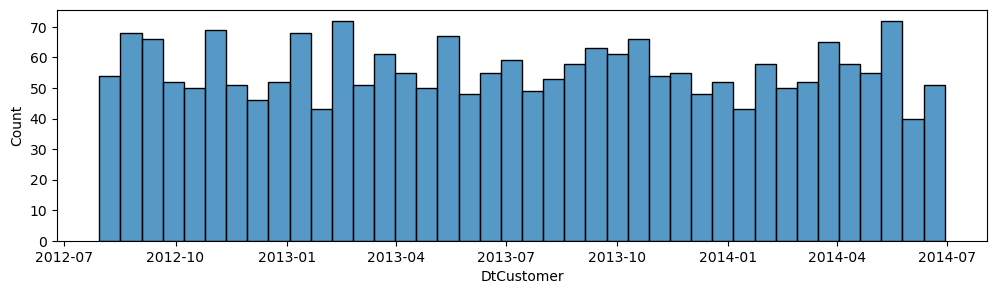

In [82]:
plt.figure(figsize=(12,3))
sns.histplot(x='DtCustomer', data=food, bins=40)
plt.show()

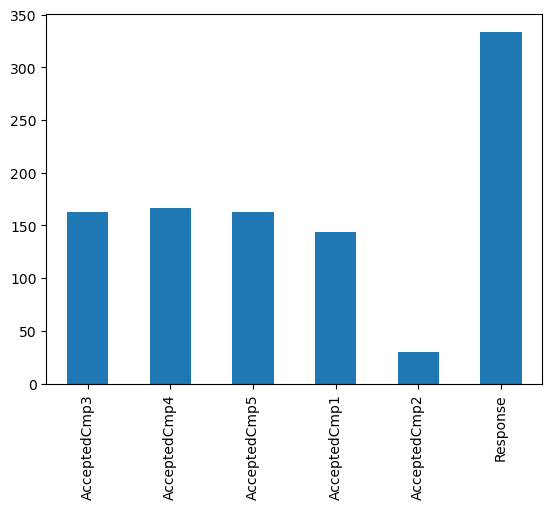

In [83]:
campaign=food[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response']].sum()
campaign.plot(kind='bar')
plt.show()

In [84]:
food['month']=food.DtCustomer.dt.month

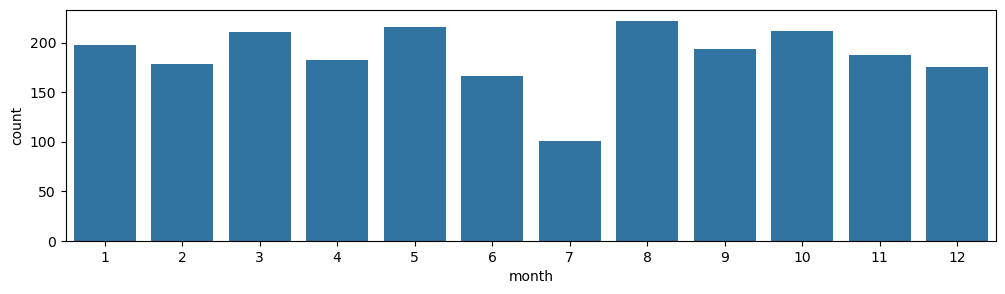

In [85]:
plt.figure(figsize=(12,3))
sns.countplot(x='month', data=food)
plt.show()

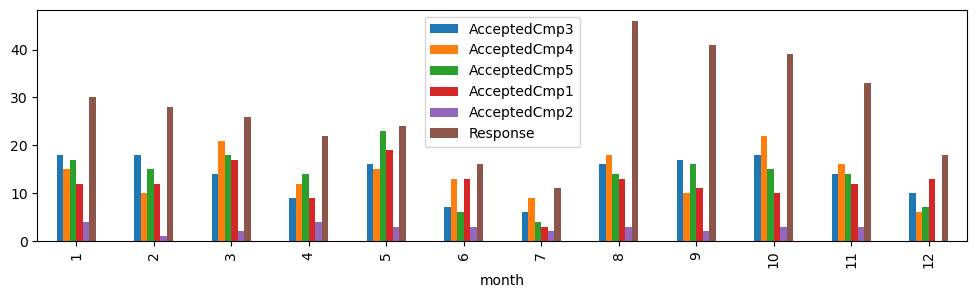

In [86]:
campaign_month=food.groupby('month')[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response']].sum()
campaign_month.plot(kind='bar', figsize=(12,3))
plt.show()

In [87]:
import csv
food.to_csv('updated_marketing_data.csv', index=False)
print("CSV file written successfully.")

CSV file written successfully.
